# Libraries used
- `caret`: Package for creating the confusion matrix and the associated stats with it
- `pROC`: Package to compute and plot Receiver Operating Characteristic (ROC) curves, calculate area under the curve (AUC), and estimate the variance & standard error of AUC
- `glmnet`:Package for fitting L1 and L2 regularization for linear regression, logistic and multinomial regression models

In [1]:
#Loading the libraries
library("pROC")
library("caret")

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var

Loading required package: lattice
Loading required package: ggplot2


## Reading the data

In [2]:
train_wine <- read.csv("Wine_training_dataset_2017.csv")# read the train datas
test_wine <- read.csv("Wine_testing_dataset_2017.csv")# read the test data

In [3]:
str(train_wine)

'data.frame':	3283 obs. of  12 variables:
 $ fixed.acidity       : num  7 6.3 7.2 8.1 6.2 8.1 7.9 6.6 8.3 6.6 ...
 $ volatile.acidity    : num  0.27 0.3 0.23 0.28 0.32 0.27 0.18 0.16 0.42 0.17 ...
 $ citric.acid         : num  0.36 0.34 0.32 0.4 0.16 0.41 0.37 0.4 0.62 0.38 ...
 $ residual.sugar      : num  20.7 1.6 8.5 6.9 7 ...
 $ chlorides           : num  0.045 0.049 0.058 0.05 0.045 0.033 0.04 0.044 0.04 0.032 ...
 $ free.sulfur.dioxide : num  45 14 47 30 30 11 16 48 41 28 ...
 $ total.sulfur.dioxide: num  170 132 186 97 136 63 75 143 172 112 ...
 $ density             : num  1.001 0.994 0.996 0.995 0.995 ...
 $ pH                  : num  3 3.3 3.19 3.26 3.18 2.99 3.18 3.54 2.98 3.25 ...
 $ sulphates           : num  0.45 0.49 0.4 0.44 0.47 0.56 0.63 0.52 0.67 0.55 ...
 $ alcohol             : num  8.8 9.5 9.9 10.1 9.6 12 10.8 12.4 9.7 11.4 ...
 $ quality             : Factor w/ 2 levels "bad","good": 2 2 2 2 2 1 1 2 1 2 ...


In [4]:
summary(train_wine)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar  
 Min.   : 3.800   Min.   :0.0800   Min.   :0.0000   Min.   : 0.600  
 1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700   1st Qu.: 1.700  
 Median : 6.800   Median :0.2600   Median :0.3200   Median : 4.800  
 Mean   : 6.852   Mean   :0.2803   Mean   :0.3357   Mean   : 6.031  
 3rd Qu.: 7.300   3rd Qu.:0.3275   3rd Qu.:0.3900   3rd Qu.: 9.000  
 Max.   :14.200   Max.   :1.1000   Max.   :1.6600   Max.   :65.800  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.00900   Min.   :  2.00      Min.   :  9.0        Min.   :0.9871  
 1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:107.0        1st Qu.:0.9917  
 Median :0.04300   Median : 33.00      Median :133.0        Median :0.9936  
 Mean   :0.04604   Mean   : 35.05      Mean   :137.7        Mean   :0.9938  
 3rd Qu.:0.05000   3rd Qu.: 45.00      3rd Qu.:166.0        3rd Qu.:0.9958  
 Max.   :0.34600   Max.   :289.00      Max.   :440.0   

From the structure and descriptive statistics of data, we can see that all 11 predictor variables are numerical and target variable is categorical.

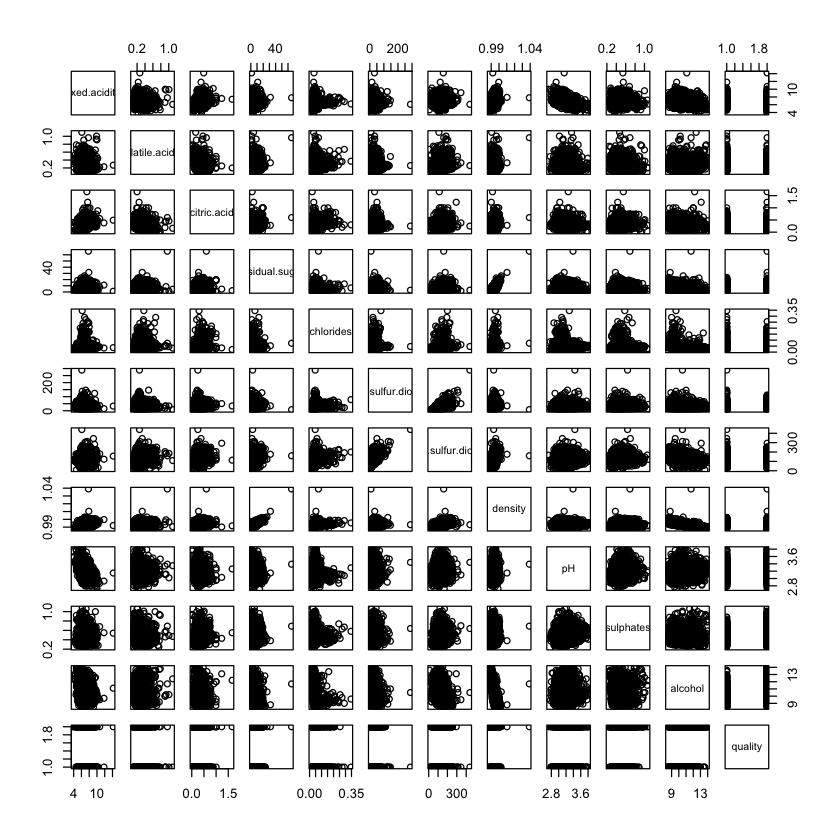

In [5]:
#plotting correlation plots for variables
pairs(train_wine)

In [6]:
cor(train_wine[-12])

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.00000000,-0.03133515,0.30135736,0.08330974,0.02287622,-0.05524392,0.076904341,0.26843608,-0.433662755,-0.016251679,-0.119797397
volatile.acidity,-0.03133515,1.00000000,-0.15641211,0.09343456,0.08216806,-0.09694925,0.099626139,0.05234912,-0.045001679,-0.020700790,0.052255406
citric.acid,0.30135736,-0.15641211,1.00000000,0.11501313,0.12690383,0.09212573,0.128813669,0.16784216,-0.183578541,0.058190005,-0.078497073
residual.sugar,0.08330974,0.09343456,0.11501313,1.00000000,0.07437767,0.29944285,0.397127315,0.82442297,-0.174532927,-0.021256591,-0.404692906
chlorides,0.02287622,0.08216806,0.12690383,0.07437767,1.00000000,0.10317620,0.192558889,0.24966833,-0.088812115,0.017447859,-0.358262237
free.sulfur.dioxide,-0.05524392,-0.09694925,0.09212573,0.29944285,0.10317620,1.00000000,0.625954107,0.29132899,-0.007354440,0.036514157,-0.252215553
total.sulfur.dioxide,0.07690434,0.09962614,0.12881367,0.39712731,0.19255889,0.62595411,1.000000000,0.52543437,0.009266154,0.130337823,-0.446703646
density,0.26843608,0.05234912,0.16784216,0.82442297,0.24966833,0.29132899,0.525434371,1.00000000,-0.070753647,0.072507626,-0.759878830
pH,-0.43366276,-0.04500168,-0.18357854,-0.17453293,-0.08881212,-0.00735444,0.009266154,-0.07075365,1.000000000,0.134862220,0.092981916
sulphates,-0.01625168,-0.02070079,0.05819000,-0.02125659,0.01744786,0.03651416,0.130337823,0.07250763,0.134862220,1.000000000,-0.009769726


In [7]:
#Initializing the data structure to be used in the step wise model
x <- colnames(train_wine[1:(ncol(train_wine) - 1)])

 y <- colnames(train_wine[ncol(train_wine)])

a <-length (x)

 best_new <- data.frame("Step" = 1:11, "Var" = "", "AUC" = 0,
                       stringsAsFactors = FALSE)

 best <- data.frame("Step" = 1:11, "Var" = "", "AUC" = 0, "SE" = 0,
                       stringsAsFactors = FALSE)

# Step wise selection by cross validation

In [8]:
#Creating function which takes the formula and generates the model based on the formiula and 
#cross validates the model for the error 
LogisticRegression <- function(data, formula) {
    k = 10 #number of folds
    pred_value <- NULL
    true_value <- NULL
    folds <- cut(seq(1,nrow(data)),breaks=10,labels=FALSE)
    # for each fold:
    for (i in 1:k) {
        
        testIndexes <- which(folds==i,arr.ind=TRUE)# generates index based on the folds
        testData <- train_wine[testIndexes, ]
        trainData <- train_wine[-testIndexes, ]
        model <- glm(formula, trainData, family = binomial) # creates a model
        pv <- predict(model, testData, "response") # predicts the value of the test Data based on the model
        pred_value <- c(pred_value, pv)
        true_value <- c(true_value, as.vector(testData$quality))
    }

    rocvalue <- roc(true_value, pred_value) # crrates an ROC object
    auc <- pROC::auc(rocvalue) # gets AUC value of ther ROC object
    se <- sqrt(var(rocvalue)) 
    
    return(list("AUC" = auc, "SE" = se, "ROC" = rocvalue))
}

In [9]:
#following function takes the parameters and put them into the formula for the regression and returns the 
#best value for the 
reg <- function(param){
    j <- x
    for (i in 1:a )
    {
    f <- paste(y, paste(c(param,j[1]), collapse = " + "),
                       sep = " ~ ")
    f<-formula(f)
    #print(f)
    #j <- j[-1]
    cv<-LogisticRegression(train_wine,f)
    best_new$Var[i] <- j[1]
      #best_new$Var[i] <- paste(c(param,j[1]), sep = ", ")
    best_new$AUC[i] <- cv$AUC
    #best$SE[i] <- cv$SE
    j <- j[-1]
    #plot(cv$ROC)
    #print (j)
}
    return (best_new)
    }

In [10]:
# Following code passes each argument into regression model and returns the value of the parameter with the
#highest AUC value
parameters <- NULL
working <- TRUE
i = 1
while(working){
    #print (i)
    d <- reg(parameters)
    #print(d)
    kk<-d[d$AUC == max(d$AUC),]
    #print (kk)
    #if (length(kk$Var) = 11){
    if (length(kk$Var) > 1){# checks the termination if the Value of AUC increases or not
        working<- FALSE
        break;
    }
    kks<- kk$Var
    #print (kks)
   #best$Var[i]<- kks
    i = i+1
    parameters <- c(parameters,kks)# keeps adding parameters till there is no increase in AUC
    #print (kkgls)
}
print (parameters)
#print(d)

[1] "alcohol"             "volatile.acidity"    "residual.sugar"     
[4] "fixed.acidity"       "sulphates"           "free.sulfur.dioxide"


####  Fit a logistic regression model, using the variables identified by forward stepwise selection by the above methods

In [11]:
#generagtes the formula for the regression
form <- paste("quality", paste(parameters, collapse = " + "), sep = " ~ ")

# Fit the stepwise model using the whole training set.
step_model <- glm(form, train_wine, family = binomial)

In [12]:
#checking the prediction of the model on test data
set.seed(5149)
pred.step<-predict(step_model, test_wine, "response")

In [13]:
#Creating confusion matrix and getting the accuracy
mat <- table(test_wine$quality,ifelse(pred.step > 0.5, "good", "bad"))
#confusionMatrix(mat)

In [14]:
#getting the coefficients of the model
co_step <- coef(step_model)

(co_step)

(Intercept)             alcohol    volatile.acidity      residual.sugar 
       -8.943936496         1.122665889        -6.888461331         0.054850292 
      fixed.acidity           sulphates free.sulfur.dioxide 
       -0.228181001         1.749092102         0.008893304

In [15]:
testlabel <- test_wine$quality

#Creating roc object for the step wise model
steproc<-roc(testlabel,pred.step)

#plot(steproc, xlab = "FPR", ylab = "TPR" , color = "Red")
confusionMatrix(mat)

Confusion Matrix and Statistics

      
       bad good
  bad  101  142
  good  62  373
                                         
               Accuracy : 0.6991         
                 95% CI : (0.663, 0.7334)
    No Information Rate : 0.7596         
    P-Value [Acc > NIR] : 0.9999         
                                         
                  Kappa : 0.2945         
 Mcnemar's Test P-Value : 3.182e-08      
                                         
            Sensitivity : 0.6196         
            Specificity : 0.7243         
         Pos Pred Value : 0.4156         
         Neg Pred Value : 0.8575         
             Prevalence : 0.2404         
         Detection Rate : 0.1490         
   Detection Prevalence : 0.3584         
      Balanced Accuracy : 0.6720         
                                         
       'Positive' Class : bad            
                                         

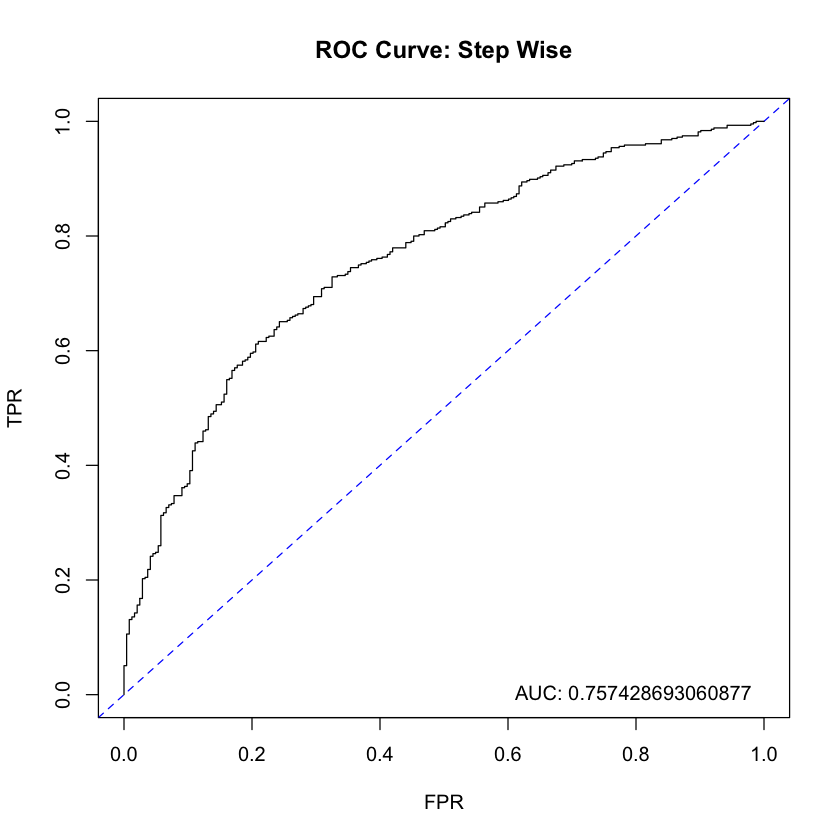

In [16]:
#Creating the plot for the step wise ROC object

plot.new()
plot.window(xlim = c(1, 0), ylim = c(0, 1))
#grid()
box()
abline(1, -1, col = "blue", lty = 2)
l <- seq(0,1,0.2)
axis(1, at = rev(l), labels = format(l, 2))
axis(2)
title(main = "ROC Curve: Step Wise", xlab = "FPR", ylab = "TPR")
lines(steproc, lwd = 1)
text(0, 0, paste("AUC: ", pROC::auc(steproc), sep = ""), pos = 2)

### Analysis of the Stepwise Model

Apply the stepwise model to the test data.  A confusion matrix and ROC curve for the predicitons of the stepwise model are shown above.

For the stepwise model, in relation to the test data:
* predictive accuracy is  69.91% ; and
* AUC is 0.7574, and the ROC curve deviates from the diagonal indicating meaningful predictive performance.
* sensitivity is 0.6196
* specificity is 0.7243

# Ridge Regularization(L2 Penality)

In [17]:
#Loading the library
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-12


Attaching package: ‘glmnet’

The following object is masked from ‘package:pROC’:

    auc



In [18]:
#Creating the sequence for the lambda values
s <- seq(-5, 5, 0.1)
lambdaseq <- 10^s

In [19]:
#Definig a model matrix for training set
xmat <- model.matrix(quality~. , data = train_wine)[,-1]
#Definig a model matrix for test set
test.mat <- model.matrix(quality~. , data = test_wine)[,-1]

In [20]:
#lambdaseq <- g

In [21]:
#Cross validating lambda for L2 penalty for logistic regression
set.seed(5149)
cv.ridge <- cv.glmnet(xmat, train_wine$quality,lambda = lambdaseq ,type.measure = "auc", alpha = 0, nfolds = 10,family = "binomial")


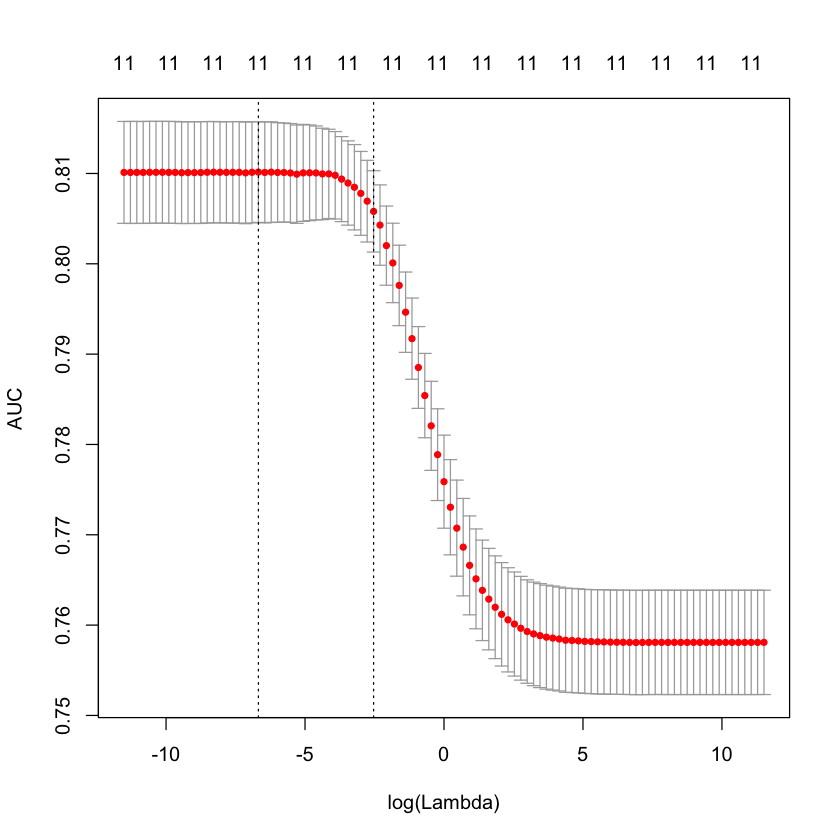

In [22]:
#Plotting the cross validated AUC value by lambda
plot(cv.ridge)

In [23]:
#return the largest lambda value within 1 std deviation of the maximun average AUC 
bestlamridge <- cv.ridge$lambda.1se

In [24]:
#Fit a logistic regression model with L2 penalty
fit.ridge <- glmnet(xmat, train_wine$quality,lambda = bestlamridge, alpha = 0, family = "binomial")

#Apply the L2 model to test set to predict the values
pred.ridge <- predict(fit.ridge, s = bestlamridge, newx = test.mat,type = "response")

In [25]:
#Creating Confusion matrix for the prediction
#mat <- table(ifelse(pred.ridge > 0.5, "good", "bad"), test_wine$quality)
mat <- table(test_wine$quality,ifelse(pred.ridge > 0.5, "good", "bad"))

confusionMatrix(mat)

Confusion Matrix and Statistics

      
       bad good
  bad   88  155
  good  33  402
                                          
               Accuracy : 0.7227          
                 95% CI : (0.6874, 0.7561)
    No Information Rate : 0.8215          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3219          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7273          
            Specificity : 0.7217          
         Pos Pred Value : 0.3621          
         Neg Pred Value : 0.9241          
             Prevalence : 0.1785          
         Detection Rate : 0.1298          
   Detection Prevalence : 0.3584          
      Balanced Accuracy : 0.7245          
                                          
       'Positive' Class : bad             
                                          

In [26]:
co_L2 <- coef(fit.ridge)[-1,]

(co_L2)

fixed.acidity     volatile.acidity          citric.acid 
        -0.092539673         -3.651401449          0.386603989 
      residual.sugar            chlorides  free.sulfur.dioxide 
         0.032318145         -5.223975715          0.007449924 
total.sulfur.dioxide              density                   pH 
        -0.002428316        -75.300728042          0.676860228 
           sulphates              alcohol 
         1.092501976          0.496322031

In [27]:
# Creating the roc object for the L2 model
rocridge <- roc(test_wine$quality, pred.ridge )

Warning message in roc.default(test_wine$quality, pred.ridge):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”

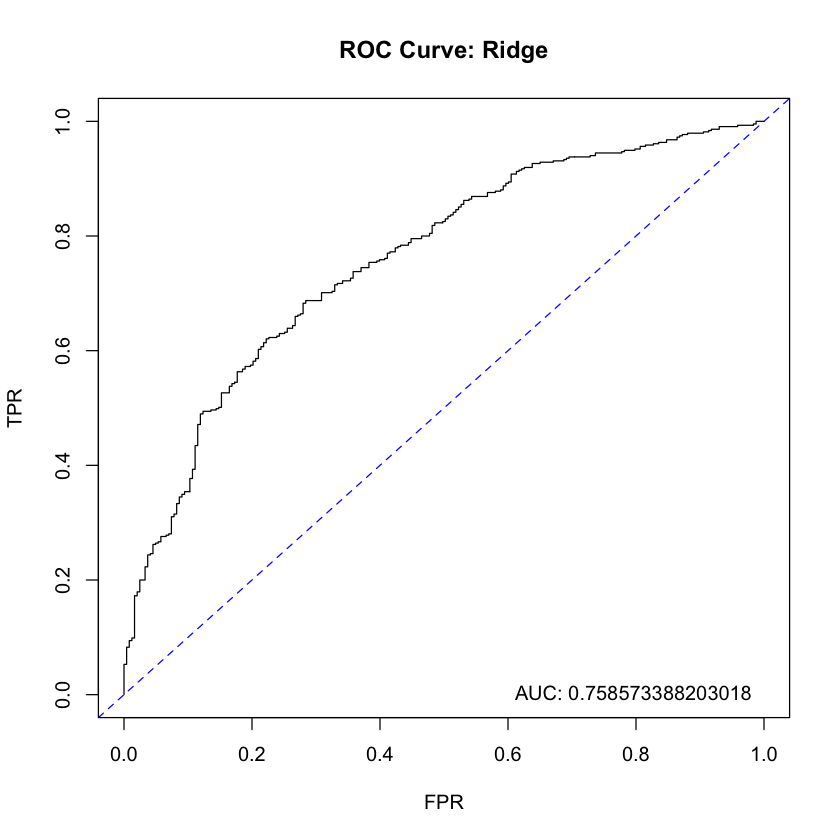

In [28]:
# Plotting the ROC curve for the test set
plot.new()
plot.window(xlim = c(1, 0), ylim = c(0, 1))
#grid()
box()
abline(1, -1, col = "blue", lty = 2)
#l <- seq(0,1,0.2)
axis(1, at = rev(l), labels = format(l, 2))
axis(2)
title(main = "ROC Curve: Ridge", xlab = "FPR", ylab = "TPR")
lines(rocridge, lwd = 1)
text(0, 0, paste("AUC: ", pROC::auc(rocridge), sep = ""), pos = 2)

### Analysis of Ridge Regularization

Apply the L2 model to the test data.  A confusion matrix and ROC curve for the predicitons of the L2 model are shown above

For the L2 model, in relation to the test data:
* predictive accuracy is approximately 72.27% 
* AUC is 0.7643, and the ROC curve deviates from the diagonal indicating meaningful predictive performance
* the sensitivity is 0.7273
* the specificity is 0.7217

# Lasso Regularization (L1 Penalty)

In [29]:
#Cross validating lambda for L1 penalty for logistic regression
cv.lasso <- cv.glmnet(xmat, train_wine$quality,lambda = lambdaseq ,type.measure = "auc", alpha = 1, nfolds = 10,family = "binomial")


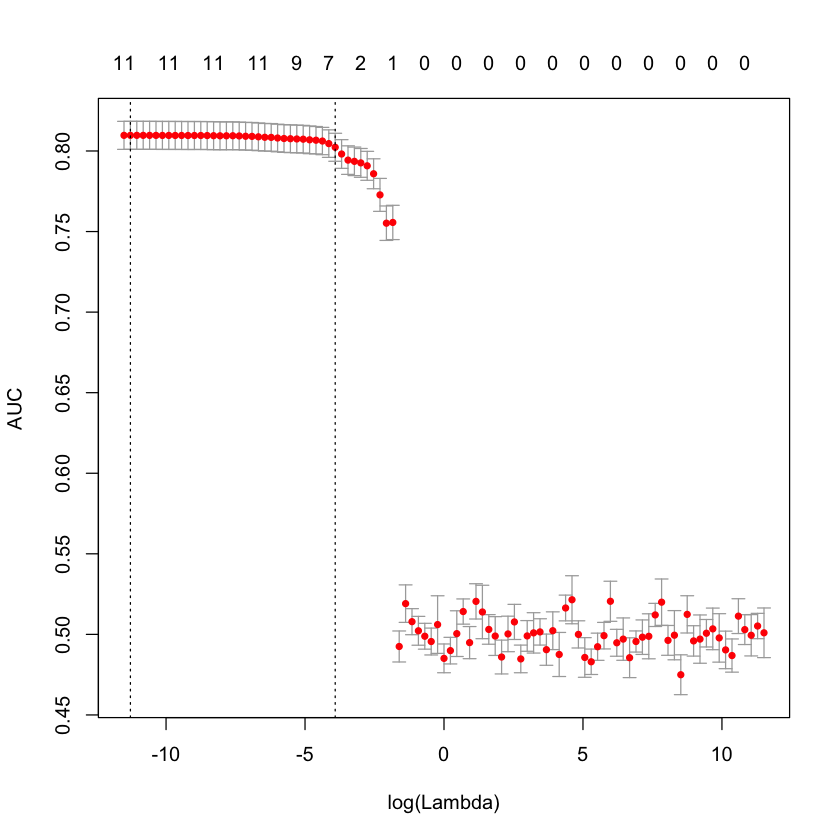

In [30]:
#Plotting the cross validated AUC value by lambda
plot(cv.lasso)

In [31]:
#return the largest lambda value within 1 std deviation of the maximun average AUC 
bestlamlasso <- cv.lasso$lambda.1se

In [32]:
bestlamlasso

[1] 0.01995262

In [33]:
#Fit a logistic regression model with L1 penalty
fit.lasso <- glmnet(xmat, train_wine$quality,lambda = bestlamlasso, alpha = 1, family = "binomial")

##Apply the L1 model to test set to predict the values
pred.lasso <- predict(fit.lasso, s = bestlamlasso, newx = test.mat,type = "response")

In [34]:
#Creating Confusion matrix for the prediction
#mat <- table(ifelse(pred.lasso > 0.5, "good", "bad"), test_wine$quality)
mat <- table(test_wine$quality,ifelse(pred.lasso > 0.5, "good", "bad"))
confusionMatrix(mat)

Confusion Matrix and Statistics

      
       bad good
  bad   95  148
  good  52  383
                                          
               Accuracy : 0.705           
                 95% CI : (0.6691, 0.7391)
    No Information Rate : 0.7832          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2973          
 Mcnemar's Test P-Value : 1.849e-11       
                                          
            Sensitivity : 0.6463          
            Specificity : 0.7213          
         Pos Pred Value : 0.3909          
         Neg Pred Value : 0.8805          
             Prevalence : 0.2168          
         Detection Rate : 0.1401          
   Detection Prevalence : 0.3584          
      Balanced Accuracy : 0.6838          
                                          
       'Positive' Class : bad             
                                          

In [35]:
co_L1 <- coef(fit.lasso)[-1,]

In [36]:
(co_L1)

fixed.acidity     volatile.acidity          citric.acid 
         -0.08186046          -4.89604576           0.00000000 
      residual.sugar            chlorides  free.sulfur.dioxide 
          0.01437859           0.00000000           0.00315716 
total.sulfur.dioxide              density                   pH 
          0.00000000           0.00000000           0.05885753 
           sulphates              alcohol 
          0.45771697           0.83974322

Warning message in roc.default(test_wine$quality, pred.lasso):
“Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector.”

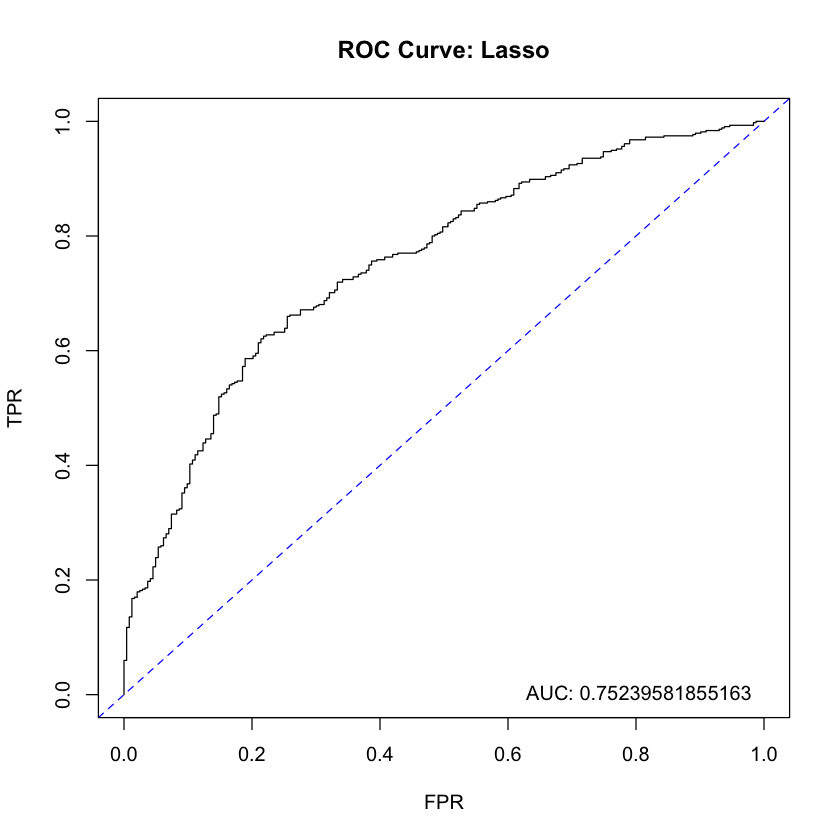

In [37]:
#Creating a roc object for the L1 penalty
roclasso <- roc(test_wine$quality, pred.lasso )

#Plotting the ROC object for the test set
plot.new()
plot.window(xlim = c(1, 0), ylim = c(0, 1))
#grid()
box()
abline(1, -1, col = "blue", lty = 2)
#l <- seq(0,1,0.2)
axis(1, at = rev(l), labels = format(l, 2))
axis(2)
title(main = "ROC Curve: Lasso", xlab = "FPR", ylab = "TPR")
lines(roclasso, lwd = 1)
text(0, 0, paste("AUC: ", pROC::auc(roclasso), sep = ""), pos = 2)

### Analysis of Lasso Regularization

Apply the L1 model to the test data.  A confusion matrix and ROC curve for the predicitons of the L2 model are shown above

For the L2 model, in relation to the test data:
* predictive accuracy is approximately 70.05% 
* AUC is 0.7524, and the ROC curve deviates from the diagonal indicating meaningful predictive performance
* the sensitivity is 0.6463
* the specificity is 0.7213

# Cross Validation for the developed models

In [38]:
# Cross validation for the step wise model
cv_step<- function(data, model) {
    k = 10 #number of folds
    pred_value <- NULL
    true_value <- NULL
    folds <- cut(seq(1,nrow(data)),breaks=10,labels=FALSE)
    # for each fold:
    for (i in 1:k) {
        
        testIndexes <- which(folds==i,arr.ind=TRUE)# generates index based on the folds
        testData <- train_wine[testIndexes, ]
        trainData <- train_wine[-testIndexes, ]
        #model <- glm(formula, trainData, family = binomial) # creates a model
        pv <- predict(model, testData, "response") # predicts the value of the test Data based on the model
        pred_value <- c(pred_value, pv)
        true_value <- c(true_value, as.vector(testData$quality))
    }

    rocvalue <- roc(true_value, pred_value) # crrates an ROC object
    auc <- pROC::auc(rocvalue) # gets AUC value of ther ROC object
    se <- sqrt(var(rocvalue)) 
    
    return(list("AUC" = auc, "SE" = se, "ROC" = rocvalue))
}

In [39]:
#Cross validation function for the regularization models
cv_reg<- function(data, model) {
    k = 10 #number of folds
    pred_value <- NULL
    true_value <- NULL
    folds <- cut(seq(1,nrow(data)),breaks=10,labels=FALSE)
    # for each fold:
    for (i in 1:k) {
        
        testIndexes <- which(folds==i,arr.ind=TRUE)# generates index based on the folds
        testData <- train_wine[testIndexes, ]
        trainData <- train_wine[-testIndexes, ]
        #Definig a model matrix for training set
        #xmat <- model.matrix(quality~. , data = train_wine)[,-1]
        #Definig a model matrix for test set
        test.mat <- model.matrix(quality~. , data = testData)[,-1]
        #model <- glm(formula, trainData, family = binomial) # creates a model
        pv <- predict(model, test.mat, "response") # predicts the value of the test Data based on the model
        pred_value <- c(pred_value, pv)
        true_value <- c(true_value, as.vector(testData$quality))
    }

    rocvalue <- roc(true_value, pred_value) # crrates an ROC object
    auc <- pROC::auc(rocvalue) # gets AUC value of ther ROC object
    se <- sqrt(var(rocvalue)) 
    
    return(list("AUC" = auc, "SE" = se, "ROC" = rocvalue))
}

In [40]:
st <-cv_step(train_wine,step_model)#Cross Validation for stepwise
rid <-cv_reg(train_wine,fit.ridge)#Cross validation for L2
lass <-cv_reg(train_wine,fit.lasso)#Cross validation for L1

In [41]:
cat("Cross Validated AUC value for stepwise model is :", st$AUC)
cat("\nCross Validated AUC value for L2 model is :", rid$AUC)
cat("\nCross Validated AUC value for L1 model is :", lass$AUC)

Cross Validated AUC value for stepwise model is : 0.8117838
Cross Validated AUC value for L2 model is : 0.8077372
Cross Validated AUC value for L1 model is : 0.8052462

# Comparing the three models

| Model     | Cross Validated AUC   |  No of Attributes | Test AUC   | Accuracy |
|-----------|-----------------------|-------------------|------------|----------|
|StepWise   |         0.812         |        6          |    0.7574  |   69.91  |
|L2         |         0.808         |        11         |    0.7586  |   72.27  | 
|L1         |         0.805         |        7          |    0.7524  |   70.05  |

The predective performance of each of the models is very similar and their accuracy is approx 70%.Each of the models achieve  a almost same AUC on the training data and test data which is approx 08 and 0.75 resp. Shape of the ROC curve for all the three models is almost same.


Step wise model and L1 model looks similar in terms of the attributes included and differ from the L2 model because L2 models includes all the attributes and make it complex.


For the given data set all the three models produce almost the same result on the test data have almost the same accuracy.If AUC is the only measure to check the performance then L2 model is the best because it has the highest AUC and the accuracy of the three models.

Additionaly , for practical purpose , L1 model can be the best model because of it less complexity and having almost same accuracy and AUC as compared to the other models.

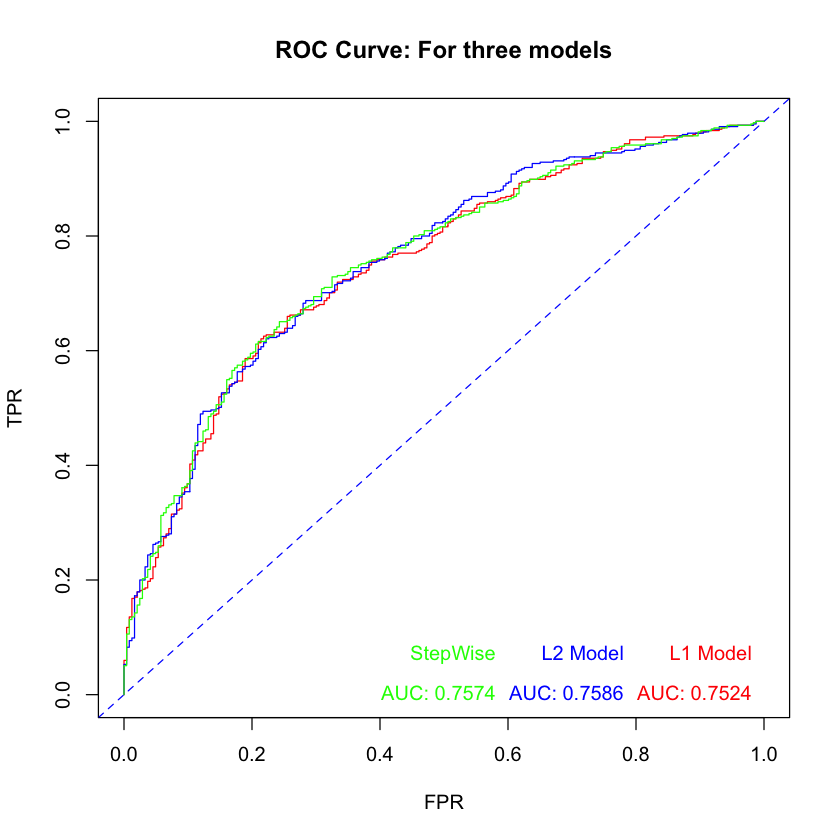

In [42]:
#Plotting all the ROC curves in a single graph
plot.new()
plot.window(xlim = c(1, 0), ylim = c(0, 1))
#grid()
box()
abline(1, -1, col = "blue", lty = 2)
l <- seq(0,1,0.2)
axis(1, at = rev(l), labels = format(l, 2))
axis(2)
title(main = "ROC Curve: For three models", xlab = "FPR", ylab = "TPR")
lines(roclasso, lwd = 1, col = "red")
lines(rocridge, lwd = 1, col = "blue")
lines(steproc, lwd = 1, col = "green")
text(0, 0, paste("AUC: ", round(pROC::auc(roclasso),4), sep = ""), pos = 2, col = "red")
text(0.2, 0, paste("AUC: ", round(pROC::auc(rocridge),4), sep = ""), pos = 2, col = "blue")
text(0.4, 0, paste("AUC: ", round(pROC::auc(steproc),4), sep = ""), pos = 2, col = "green")

text(0, 0.07, "L1 Model", pos = 2, col = "red")
text(0.2, 0.07, "L2 Model", pos = 2, col = "blue")
text(0.4, 0.07, "StepWise", pos = 2, col = "green")